<a href="https://colab.research.google.com/github/amoakoh22/15M-EURUSD-PCP-Pattern-Recognition/blob/main/PCPEURUSD15M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment setup

Step 1: Set Up Colab Environment

Importing dependencies

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Data Acquisition and Exploration

Step 2: Fetch **Real-Time OHLC Data** using **mt5**

In [ ]:
# I have mounted my Google Drive
ohlc_data = pd.read_csv('/content/drive/MyDrive/PCP Dataset/EURUSD_M15.csv')
print(ohlc_data.head(10))
'''
15 minutes dataset loading

'''

  <DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0  2020.10.16\t00:00:00\t1.17061\t1.17074\t1.1701...                        
1  2020.10.16\t00:15:00\t1.17065\t1.17068\t1.1700...                        
2  2020.10.16\t00:30:00\t1.17022\t1.17079\t1.1701...                        
3  2020.10.16\t00:45:00\t1.17068\t1.17120\t1.1706...                        
4  2020.10.16\t01:00:00\t1.17116\t1.17149\t1.1710...                        
5  2020.10.16\t01:15:00\t1.17104\t1.17136\t1.1709...                        
6  2020.10.16\t01:30:00\t1.17115\t1.17132\t1.1707...                        
7  2020.10.16\t01:45:00\t1.17076\t1.17095\t1.1706...                        
8  2020.10.16\t02:00:00\t1.17085\t1.17085\t1.1705...                        
9  2020.10.16\t02:15:00\t1.17074\t1.17078\t1.1702...                        


'\n15 minutes dataset loading\n\n'

Data Cleaning

Store Data in Pandas DataFrame

In [ ]:
import pandas as pd

# Load the dataset, specifying the tab separator
ohlc_data = pd.read_csv('/content/drive/MyDrive/PCP Dataset/EURUSD_M15.csv', sep='\t')

# Display the first few rows to understand the structure
print("Initial Data:")
print(ohlc_data.head(10))

# Clean the column names by removing angle brackets
ohlc_data.columns = [col.strip('<>') for col in ohlc_data.columns]

# Combine the DATE and TIME columns into a single datetime column
ohlc_data['DATETIME'] = pd.to_datetime(ohlc_data['DATE'] + ' ' + ohlc_data['TIME'], format='%Y.%m.%d %H:%M:%S')

# Set the DATETIME column as the index
ohlc_data.set_index('DATETIME', inplace=True)

# Drop the original DATE and TIME columns if they're no longer needed
ohlc_data.drop(columns=['DATE', 'TIME'], inplace=True)

# Check for missing data and fill if necessary
ohlc_data.dropna(inplace=True)  # Drop rows with missing values

# Display cleaned data
print("\nCleaned Data:")
print(ohlc_data.head(10))
print("\nData Types:")
print(ohlc_data.dtypes)  # Check data types of the columns




Initial Data:
       <DATE>    <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
0  2020.10.16  00:00:00  1.17061  1.17074  1.17011  1.17065        285      0   
1  2020.10.16  00:15:00  1.17065  1.17068  1.17002  1.17022        340      0   
2  2020.10.16  00:30:00  1.17022  1.17079  1.17012  1.17068        258      0   
3  2020.10.16  00:45:00  1.17068  1.17120  1.17068  1.17116        322      0   
4  2020.10.16  01:00:00  1.17116  1.17149  1.17103  1.17104        459      0   
5  2020.10.16  01:15:00  1.17104  1.17136  1.17091  1.17115        260      0   
6  2020.10.16  01:30:00  1.17115  1.17132  1.17074  1.17077        312      0   
7  2020.10.16  01:45:00  1.17076  1.17095  1.17069  1.17084        247      0   
8  2020.10.16  02:00:00  1.17085  1.17085  1.17055  1.17074        226      0   
9  2020.10.16  02:15:00  1.17074  1.17078  1.17029  1.17037        197      0   

   <SPREAD>  
0        10  
1        10  
2        10  
3        10  
4        10  
5        1

Explanation:

Ticker: Specify the financial instrument (e.g., EURUSD=X for EUR/USD
forex pair).

---


Interval: Fetch 15-minute candlestick data.

---


Period: 2020 to 2024.



Step 4: Visualize OHLC Data line plot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


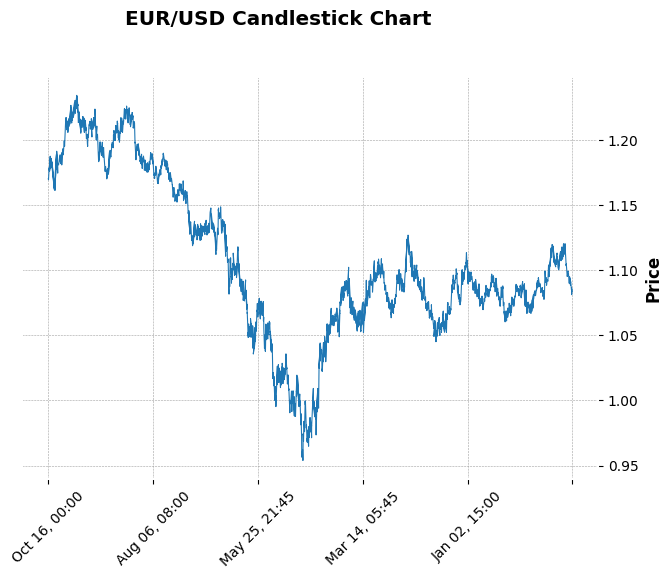

In [ ]:
!pip install mplfinance
import mplfinance as mpf
import pandas as pd

# Assuming ohlc_data is your DataFrame

# Convert the index to a 'Datetime' column
ohlc_data = ohlc_data.reset_index()

# Rename the index column to 'Datetime' if necessary
ohlc_data = ohlc_data.rename(columns={'DATETIME': 'Datetime'})  # If your index column is named 'DATETIME'

# Convert 'Datetime' column to datetime objects
ohlc_data['Datetime'] = pd.to_datetime(ohlc_data['Datetime'])  # Ensure 'Datetime' column is in datetime format

# Set 'Datetime' column as the index
ohlc_data.set_index('Datetime', inplace=True)

# Rename the columns to match mplfinance's expected format
ohlc_data = ohlc_data.rename(columns={
    'OPEN': 'Open',
    'HIGH': 'High',
    'LOW': 'Low',
    'CLOSE': 'Close',
    'VOLUME': 'Volume'  # If you have a volume column
})

# Create a candlestick chart using mplfinance
mpf.plot(ohlc_data, type='line', style='charles', title='EUR/USD Candlestick Chart', ylabel='Price', volume=False)

Candlestick plot for subdata

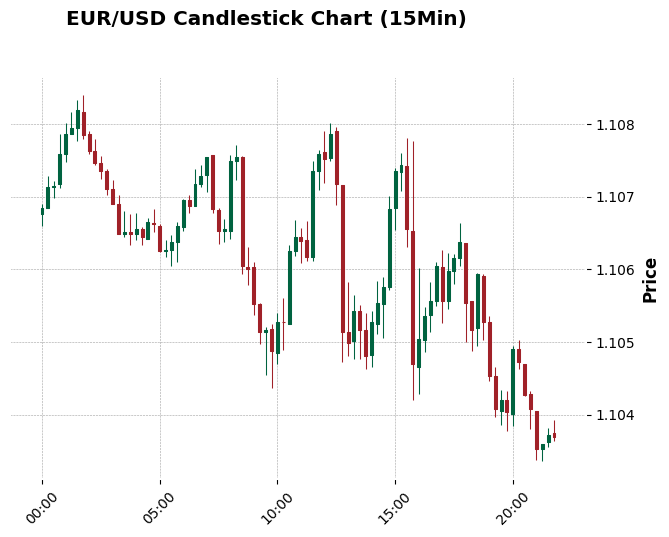

In [ ]:
# Define the start and end dates for the desired date range
start_date = '2023-12-29'
end_date = '2023-12-31'

# Create a sub-dataset for the specified date range
sub_ohlc_data = ohlc_data[start_date:end_date]

# Rename columns to match mplfinance's expected format
sub_ohlc_data = sub_ohlc_data.rename(columns={
    'OPEN': 'Open',
    'HIGH': 'High',
    'LOW': 'Low',
    'CLOSE': 'Close',
    'VOLUME': 'Volume'  # If you have a volume column
})

# Create a candlestick chart using mplfinance for the sub-dataset
mpf.plot(sub_ohlc_data, type='candle', style='charles', title='EUR/USD Candlestick Chart (15Min)', ylabel='Price', volume=False)

# The Deterministic PCP logic

Step 5: The PCP Logic on overall dataset

In [ ]:
import numpy as np

def label_pcp(data):
    """Label data with Bullish (1), Bearish (0), or No Pattern (-1)."""
    labels = np.full(len(data), -1)  # Default to -1 (No Pattern)

    for i in range(2, len(data)):
        # Access OHLC values for candlesticks n-2, n-1, and n
        L2, L1, L0 = data['Low'].iloc[i-2:i+1]
        H2, H1, H0 = data['High'].iloc[i-2:i+1]

        # Bullish PCP condition
        if (L1 < L0) and (L1 < L2) and (H1 < H0) and (H1 < H2):
            labels[i] = 1  # Bullish

        # Bearish PCP condition
        elif (H1 > H0) and (H1 > H2) and (L1 > L0) and (L1 > L2):
            labels[i] = 0  # Bearish

    return labels

# Apply labeling function to the OHLC data
ohlc_data['PCP_Label'] = label_pcp(ohlc_data)

# Access 'Datetime' from the index
# Reset the index to make 'Datetime' a regular column
ohlc_data = ohlc_data.reset_index()

# Display a portion of the labeled dataset
print(ohlc_data[['Datetime', 'Open', 'High', 'Low', 'Close', 'PCP_Label']].head(100))

              Datetime     Open     High      Low    Close  PCP_Label
0  2020-10-16 00:00:00  1.17061  1.17074  1.17011  1.17065         -1
1  2020-10-16 00:15:00  1.17065  1.17068  1.17002  1.17022         -1
2  2020-10-16 00:30:00  1.17022  1.17079  1.17012  1.17068          1
3  2020-10-16 00:45:00  1.17068  1.17120  1.17068  1.17116         -1
4  2020-10-16 01:00:00  1.17116  1.17149  1.17103  1.17104         -1
..                 ...      ...      ...      ...      ...        ...
95 2020-10-18 23:45:00  1.17146  1.17154  1.17141  1.17151         -1
96 2020-10-19 00:00:00  1.17151  1.17223  1.17145  1.17187         -1
97 2020-10-19 00:15:00  1.17187  1.17193  1.17176  1.17189         -1
98 2020-10-19 00:30:00  1.17190  1.17196  1.17171  1.17176         -1
99 2020-10-19 00:45:00  1.17176  1.17231  1.17172  1.17231         -1

[100 rows x 6 columns]


Determining number of classes in the model

In [ ]:
class_counts = ohlc_data['PCP_Label'].value_counts()
print(class_counts)


PCP_Label
-1    79442
 1    10263
 0    10223
Name: count, dtype: int64


Ploting Distribution of classes modeled

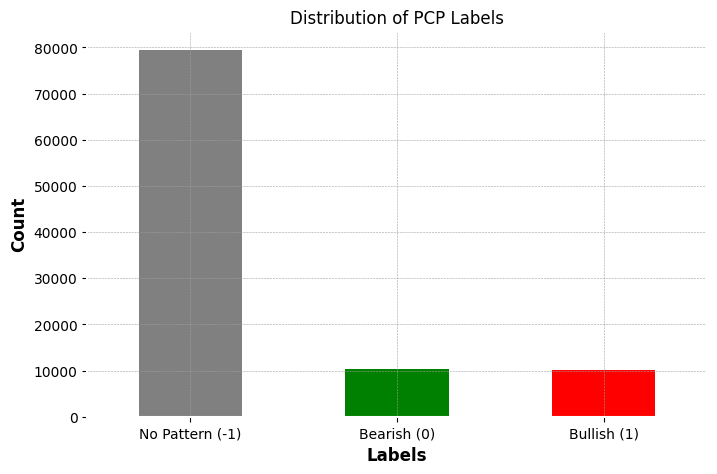

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
class_counts = ohlc_data['PCP_Label'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['gray', 'green', 'red'])
plt.title('Distribution of PCP Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['No Pattern (-1)', 'Bearish (0)', 'Bullish (1)'], rotation=0)
plt.show()


Running PCP logic on subdata

In [ ]:
# Apply labeling function to the OHLC data
sub_ohlc_data['PCP_Label'] = label_pcp(sub_ohlc_data)

# Access 'Datetime' from the index
# Reset the index to make 'Datetime' a regular column
sub_ohlc_data = sub_ohlc_data.reset_index()

# Display a portion of the labeled dataset
print(sub_ohlc_data[['Datetime', 'Open', 'High', 'Low', 'Close', 'PCP_Label']].head(100))

              Datetime     Open     High      Low    Close  PCP_Label
0  2023-12-29 00:00:00  1.10676  1.10690  1.10659  1.10685         -1
1  2023-12-29 00:15:00  1.10685  1.10729  1.10685  1.10713         -1
2  2023-12-29 00:30:00  1.10713  1.10721  1.10698  1.10715         -1
3  2023-12-29 00:45:00  1.10717  1.10787  1.10712  1.10759         -1
4  2023-12-29 01:00:00  1.10759  1.10801  1.10748  1.10787         -1
..                 ...      ...      ...      ...      ...        ...
83 2023-12-29 20:45:00  1.10428  1.10432  1.10380  1.10407         -1
84 2023-12-29 21:00:00  1.10405  1.10405  1.10337  1.10352         -1
85 2023-12-29 21:15:00  1.10352  1.10360  1.10336  1.10359         -1
86 2023-12-29 21:30:00  1.10362  1.10382  1.10355  1.10372          1
87 2023-12-29 21:45:00  1.10375  1.10393  1.10364  1.10369         -1

[88 rows x 6 columns]


Showing the **PCP** **logic** on chart

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


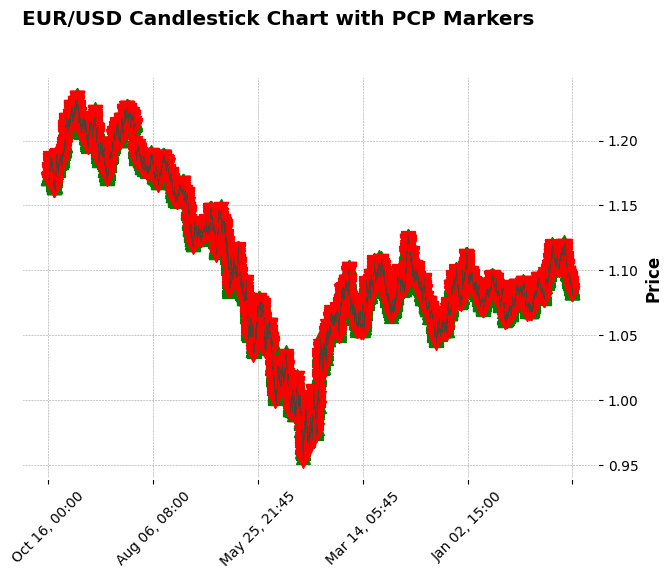

"\nWorks successfully. Here's a breakdown of what's happening:\nThe Green upward tringle shows the Bullish PCP.\nThe Red downward triangle shows the Bearish PCP.\n"

In [ ]:
import mplfinance as mpf
import pandas as pd
import numpy as np

# ... (your existing label_pcp function and code to apply it) ...

# If 'level_0' already exists, drop it before resetting the index
if 'level_0' in ohlc_data.columns:
    ohlc_data = ohlc_data.drop(columns=['level_0'])

# Reset the index to make 'Datetime' a regular column for plotting
ohlc_data = ohlc_data.reset_index()

# Create addplot objects using the lists of marker data
addplot = []  # Initialize addplot as a list

# Create a Series for Bullish and Bearish markers with the same index as ohlc_data
bullish_markers = pd.Series(np.nan, index=ohlc_data.index)
bearish_markers = pd.Series(np.nan, index=ohlc_data.index)

# Iterate through the data and assign marker values to the Series
for i in range(len(ohlc_data)):
    if ohlc_data['PCP_Label'].iloc[i] == 1:  # Bullish PCP
        bullish_markers.iloc[i] = ohlc_data['High'].iloc[i] + 0.0005
    elif ohlc_data['PCP_Label'].iloc[i] == 0:  # Bearish PCP
        bearish_markers.iloc[i] = ohlc_data['Low'].iloc[i] - 0.0005

# Add the markers to the addplot list
if not bullish_markers.isnull().all():  # Check if there are any bullish markers
    addplot.append(mpf.make_addplot(bullish_markers,
                                    type='scatter',
                                    markersize=100,
                                    marker='^',
                                    color='green',
                                    panel=0,
                                    scatter=True))

if not bearish_markers.isnull().all():  # Check if there are any bearish markers
    addplot.append(mpf.make_addplot(bearish_markers,
                                    type='scatter',
                                    markersize=100,
                                    marker='v',
                                    color='red',
                                    panel=0,
                                    scatter=True))

# Set 'Datetime' column as index again for mplfinance
ohlc_data.set_index('Datetime', inplace=True)

# Create the candlestick chart with added markers
mpf.plot(ohlc_data,
         type='candle',
         style='charles',
         title='EUR/USD Candlestick Chart with PCP Markers',
         ylabel='Price',
         volume=False,
         addplot=addplot)

'''
Works successfully. Here's a breakdown of what's happening:
The Green upward tringle shows the Bullish PCP.
The Red downward triangle shows the Bearish PCP.
'''

PCP Logic visualisation on subdata (2 days dataset 29 - 31 December 2023)

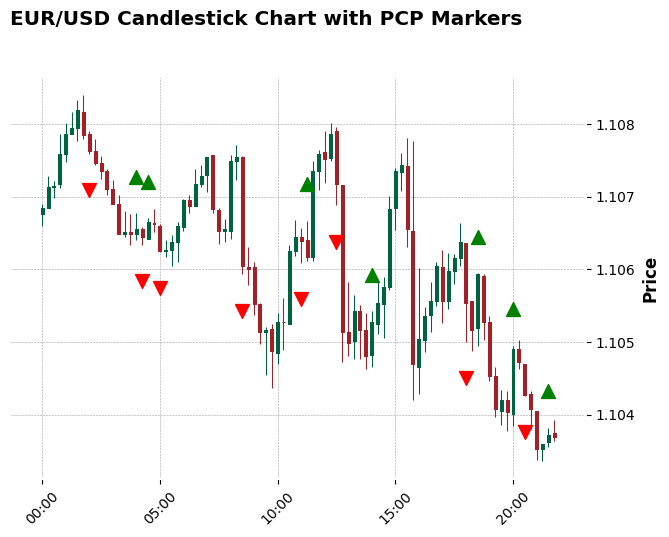

"\nWorks successfully. Here's a breakdown of what's happening:\nThe Green upward tringle shows the Bullish PCP.\nThe Red downward triangle shows the Bearish PCP.\n"

In [ ]:
import mplfinance as mpf
import pandas as pd
import numpy as np

# ... (your existing label_pcp function and code to apply it) ...

# If 'level_0' already exists, drop it before resetting the index
if 'level_0' in sub_ohlc_data.columns:
    sub_ohlc_data = sub_ohlc_data.drop(columns=['level_0'])

# Reset the index to make 'Datetime' a regular column for plotting
sub_ohlc_data = sub_ohlc_data.reset_index()

# Create addplot objects using the lists of marker data
addplot = []  # Initialize addplot as a list

# Create a Series for Bullish and Bearish markers with the same index as sub_ohlc_data
bullish_markers = pd.Series(np.nan, index=sub_ohlc_data.index)
bearish_markers = pd.Series(np.nan, index=sub_ohlc_data.index)

# Iterate through the data and assign marker values to the Series
# Use len(sub_ohlc_data) to iterate over the correct DataFrame
for i in range(len(sub_ohlc_data)):
    if sub_ohlc_data['PCP_Label'].iloc[i] == 1:  # Bullish PCP
        bullish_markers.iloc[i] = sub_ohlc_data['High'].iloc[i] + 0.0005
    elif sub_ohlc_data['PCP_Label'].iloc[i] == 0:  # Bearish PCP
        bearish_markers.iloc[i] = sub_ohlc_data['Low'].iloc[i] - 0.0005

# Add the markers to the addplot list
if not bullish_markers.isnull().all():  # Check if there are any bullish markers
    addplot.append(mpf.make_addplot(bullish_markers,
                                    type='scatter',
                                    markersize=100,
                                    marker='^',
                                    color='green',
                                    panel=0,
                                    scatter=True))

if not bearish_markers.isnull().all():  # Check if there are any bearish markers
    addplot.append(mpf.make_addplot(bearish_markers,
                                    type='scatter',
                                    markersize=100,
                                    marker='v',
                                    color='red',
                                    panel=0,
                                    scatter=True))

# Set 'Datetime' column as index again for mplfinance
sub_ohlc_data.set_index('Datetime', inplace=True)

# Create the candlestick chart with added markers
mpf.plot(sub_ohlc_data,
         type='candle',
         style='charles',
         title='EUR/USD Candlestick Chart with PCP Markers',
         ylabel='Price',
         volume=False,
         addplot=addplot)

'''
Works successfully. Here's a breakdown of what's happening:
The Green upward tringle shows the Bullish PCP.
The Red downward triangle shows the Bearish PCP.
'''

We Focused on Bullish and Bearish Signals Only: Our goal is strictly to identify and act upon bullish or bearish patterns, we considered removing the No Pattern entries from our dataset. This can be done by filtering the dataset to only include the rows with PCP_Label of 0 (Bearish) or 1 (Bullish).

Model Adjustment: Ensured that our model, evaluation metrics, and any preprocessing steps reflect this change. This includes modifying our training and testing datasets to only consist of the relevant classes.

In [ ]:
# Exclude rows with No Pattern (-1)
filtered_ohlc_data = ohlc_data[ohlc_data['PCP_Label'] != -1]

# Separate features and labels
X = filtered_ohlc_data[['Open', 'High', 'Low', 'Close']]
y = filtered_ohlc_data['PCP_Label']  # This will now only contain 0 and 1

# Proceed with your modeling...


# Data Modeling

Step 6: Train-Test Split

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

# Assuming 'filtered_ohlc_data' already excludes rows with No Pattern (-1)
# Define features (OHLC values) and target labels (PCP_Label)
X = filtered_ohlc_data[['Open', 'High', 'Low', 'Close']].values
y = filtered_ohlc_data['PCP_Label'].values

# Initialize TimeSeriesSplit with the desired number of splits
tscv = TimeSeriesSplit(n_splits=5)  # Adjust n_splits as needed

# Iterate through the splits
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Print the shapes of the training and testing sets for confirmation
    print(f'Train set: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
    print(f'Test set: X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')



Train set: X_train shape: (3416, 4), y_train shape: (3416,)
Test set: X_test shape: (3414, 4), y_test shape: (3414,)
Train set: X_train shape: (6830, 4), y_train shape: (6830,)
Test set: X_test shape: (3414, 4), y_test shape: (3414,)
Train set: X_train shape: (10244, 4), y_train shape: (10244,)
Test set: X_test shape: (3414, 4), y_test shape: (3414,)
Train set: X_train shape: (13658, 4), y_train shape: (13658,)
Test set: X_test shape: (3414, 4), y_test shape: (3414,)
Train set: X_train shape: (17072, 4), y_train shape: (17072,)
Test set: X_test shape: (3414, 4), y_test shape: (3414,)


Step 7: Normalize the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform training data, transform test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

'''
Normalization ensures that input values are scaled consistently, improving the performance of the neural network.
'''

'\nNormalization ensures that input values are scaled consistently, improving the performance of the neural network.\n'

Data Preprocessing
To ensure robust model performance, it is essential to preprocess the data appropriately. We assume that X_train, X_test, y_train, and y_test are ready, but let's ensure everything is accurately formatted.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm the scaling
print("First five rows of scaled training features:")
print(X_train_scaled[:5])


First five rows of scaled training features:
[[0.90969504 0.91373599 0.91297532 0.91671544]
 [0.92208411 0.92235538 0.92490162 0.92381671]
 [0.91135699 0.90798973 0.91357918 0.91067181]
 [0.91090373 0.90995556 0.91373015 0.91399581]
 [0.91060155 0.90889704 0.91523981 0.91218272]]


# Model Development

Step 8: Design the Neural Network Architecture

We'll build a Sequential neural network. For this binary classification (Bullish vs Bearish), we use a softmax activation function at the output layer to handle two classes:

Class 1: Bullish


---


Class 0: Bearish




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

# Initialize the Sequential model
model = Sequential()

# Input Layer + Hidden Layer 1 with Batch Normalization
model.add(Input(shape=(X_train_scaled.shape[1],)) )  # Number of features
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Hidden Layer 2 with Batch Normalization
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output Layer (2 classes: Bearish, Bullish)
model.add(Dense(2, activation='softmax'))  # Adjusted for 2 classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,850 (11.13 KB)

 Trainable params: 2,658 (10.38 KB)

 Non-trainable params: 192 (768.00 B)

Step 9: Train the SNN Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up EarlyStopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4926 - loss: 0.9208 - val_accuracy: 0.4937 - val_loss: 0.6936
Epoch 2/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5119 - loss: 0.7301 - val_accuracy: 0.5511 - val_loss: 0.6897
Epoch 3/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5179 - loss: 0.7053 - val_accuracy: 0.5086 - val_loss: 0.6874
Epoch 4/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5310 - loss: 0.6987 - val_accuracy: 0.4937 - val_loss: 0.9577
Epoch 5/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5532 - loss: 0.6885 - val_accuracy: 0.4946 - val_loss: 0.6807
Epoch 6/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6010 - loss: 0.6697 - val_accuracy: 0.5177 - val_loss: 0.7067
Epoch 7/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6459 - loss: 0.6214 - val_accuracy: 0.4987 - val_loss: 0.7604
Epoch 8/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7080 - loss: 0.5521 - val_accuracy: 0.

# Model Evaluation and Performance Metrics

Step 10: Plot Training and Validation Loss/Accuracy

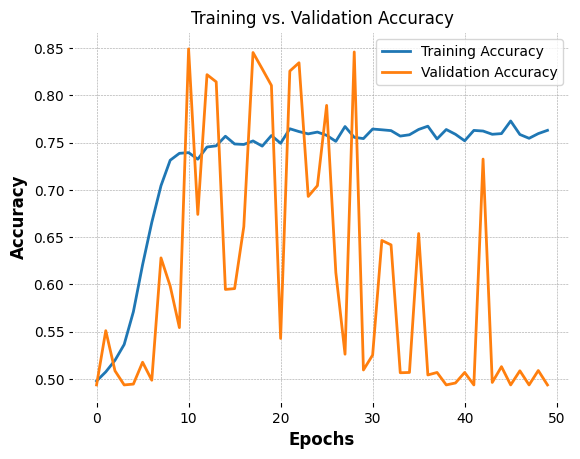

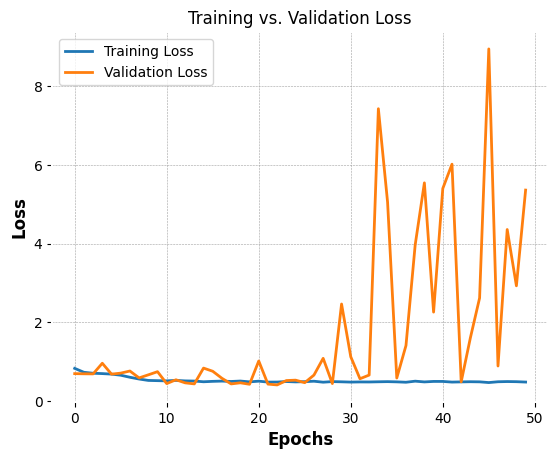

"\nNB: After training a model, it's essential to visualize the model's performance to assess convergence.\n"

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()



'''
NB: After training a model, it's essential to visualize the model's performance to assess convergence.
'''

Step 11: Evaluate the Model on Test Data

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8270 - loss: 0.4440
Test Loss: 0.4364
Test Accuracy: 0.8295


Step 12: Generate Predictions on Test Data

In [ ]:
# Generate predictions for the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Print the first 10 predictions for inspection
print(f"Predicted Labels: {y_pred[:100]}")
print(f"Actual Labels: {y_test[:100]}")



'''
Use the trained model to generate predictions and convert them to meaningful classes (Bullish, Bearish, No Pattern).
'''

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted Labels: [0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
Actual Labels: [1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1
 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0]


'\nUse the trained model to generate predictions and convert them to meaningful classes (Bullish, Bearish, No Pattern).\n'

Step 13: Calculate Classification Metrics

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

     Bearish       0.88      0.77      0.82      1714
     Bullish       0.79      0.89      0.84      1700

    accuracy                           0.83      3414
   macro avg       0.83      0.83      0.83      3414
weighted avg       0.83      0.83      0.83      3414



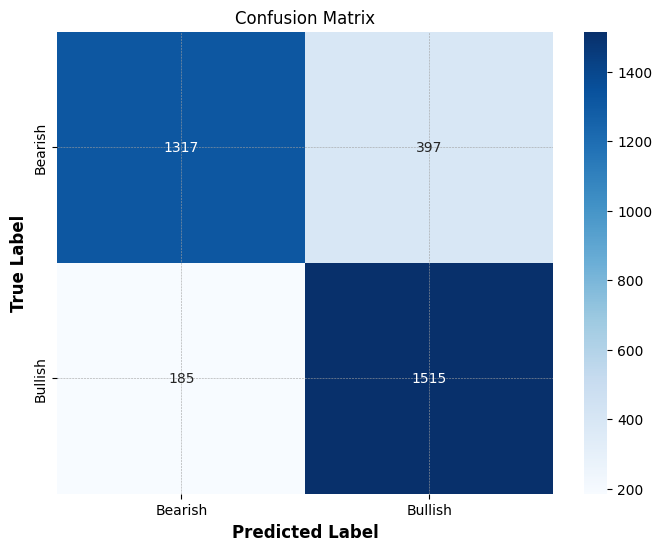

'\nWe’ll use the classification report and confusion matrix to evaluate the prediction performance.\n'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assume you have a model that produces predictions
y_pred_prob = model.predict(X_test)  # Get probabilities from your model
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Get predicted classes from probabilities

# Ensure y_pred_classes and y_test have the same length
if len(y_pred_classes) != len(y_test):
    print(f"Length mismatch: y_pred_classes has {len(y_pred_classes)} entries, y_test has {len(y_test)} entries.")
    y_pred_classes = y_pred_classes[:len(y_test)]  # This line is crucial

# Generate classification report
print(classification_report(y_test, y_pred_classes, target_names=['Bearish', 'Bullish']))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Bearish', 'Bullish'],
            yticklabels=['Bearish', 'Bullish'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




'''
We’ll use the classification report and confusion matrix to evaluate the prediction performance.
'''

# Model Saving and Deployment

Step 14: Save the Trained Model

In [ ]:
# Save the model
model.save('pcp_model15.keras')
print('Model saved successfully.')


'''
Save the trained model for future use or deployment.
'''

Model saved successfully.


'\nSave the trained model for future use or deployment.\n'

Step 15: Load and Use the Saved Model (Optional)

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('pcp_model15.keras')

# Make predictions with the loaded model
#new_predictions = loaded_model.predict(X_test)

'''
If you need to reload the model later to make predictions
'''

'\nIf you need to reload the model later to make predictions\n'